<a href="https://colab.research.google.com/github/jkchandalia/nlpower/blob/main/notebooks/4.0%20Generative_AI_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generative AI - Diffusion**

In [2]:
#@title **Setup**
!pip install diffusers accelerate| grep -v -e 'already satisfied' -e 'Downloading'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## [Diffusion](https://huggingface.co/docs/diffusers/index)

### Model Overview
<figure>
<center>
<p align="center">
<img src='https://drive.google.com/uc?export=view&id=17aK7j_ZRB3r0S9mAb2S7Ikz74bFPbW18' alt="Stable Diffusion Model", width="600" height="400"/>
</p>
<figcaption>Text-Image Alignment in Stable Diffusion Models (credit: OpenAI)</figcaption></center>
</figure>

A key component of Stable Diffusion is embedding alignment between related text and images. 

This allows us to go from **text -> text embedding -> image embedding -> image**. 

In [27]:
#@title Import libraries
from diffusers import DiffusionPipeline
import torch
import requests
from PIL import Image
from io import BytesIO

from diffusers import StableDiffusionImg2ImgPipeline


### *Model*

In [28]:
device = "cuda"
generator = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1")
generator.to(device)

/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.15.0",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

### *Prompt*

In [29]:
prompt = "An image of a squirrel in Monet style"
prompt2 = "a black and white cartoon of girl diving off a cliff in the style of shell silverstein"

### *Image Generation from Text*

  0%|          | 0/50 [00:00<?, ?it/s]

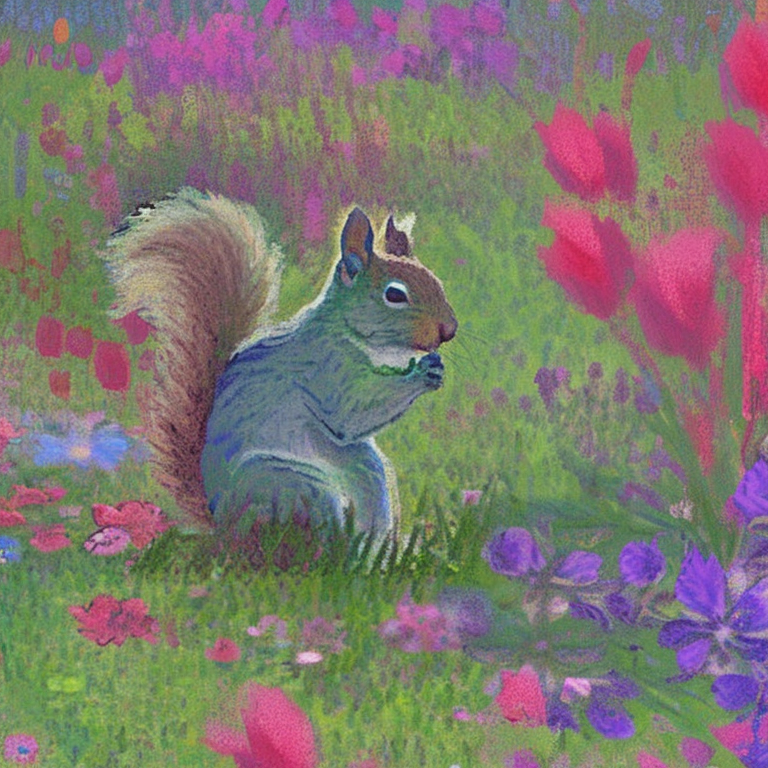

In [30]:


image = generator(prompt).images[0]
#image.save("image_of_squirrel_painting.png")
image

  0%|          | 0/50 [00:00<?, ?it/s]

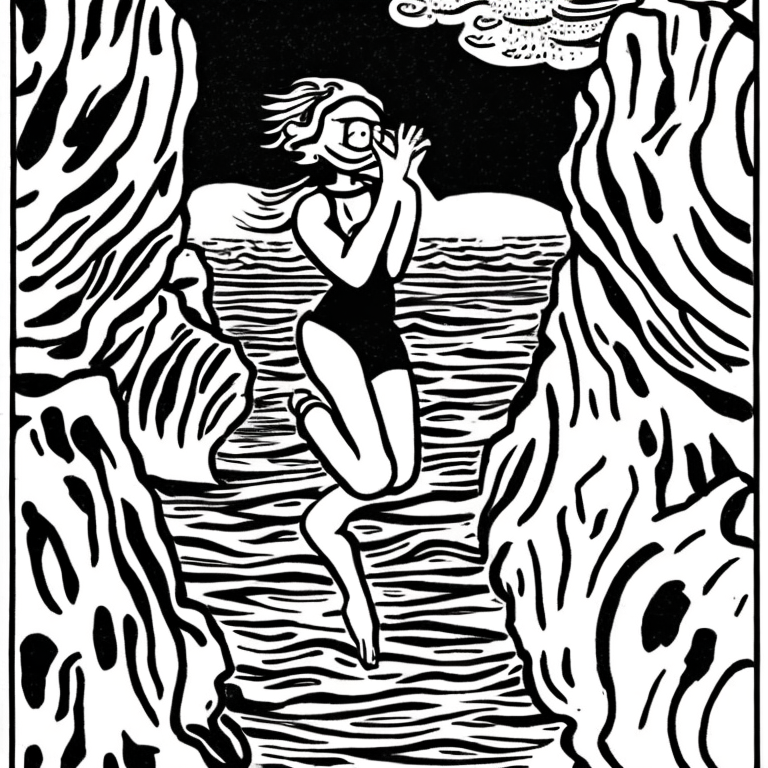

In [31]:


image = generator(prompt2).images[0]
#image.save("image_of_squirrel_painting.png")
image

#### What do we think of the output? Let's try the same prompt in [DALL-E 2](https://labs.openai.com/) and compare.

***

### *Model*

In [10]:
# load the pipeline

pipe = StableDiffusionImg2ImgPipeline.from_pretrained("stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16).to(
    'cuda'
)

### *Initial Image*

In [2]:
import os
os.listdir('./sample_data')

['anscombe.json',
 'README.md',
 'boyandgirl.jpg',
 'mnist_test.csv',
 'mnist_train_small.csv',
 'california_housing_train.csv',
 'california_housing_test.csv']

In [55]:
# let's download an initial image
url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
from PIL import Image
 
# Read image
init_image = Image.open('./sample_data/boyandgirl.jpg')
init_image.thumbnail((768, 768))

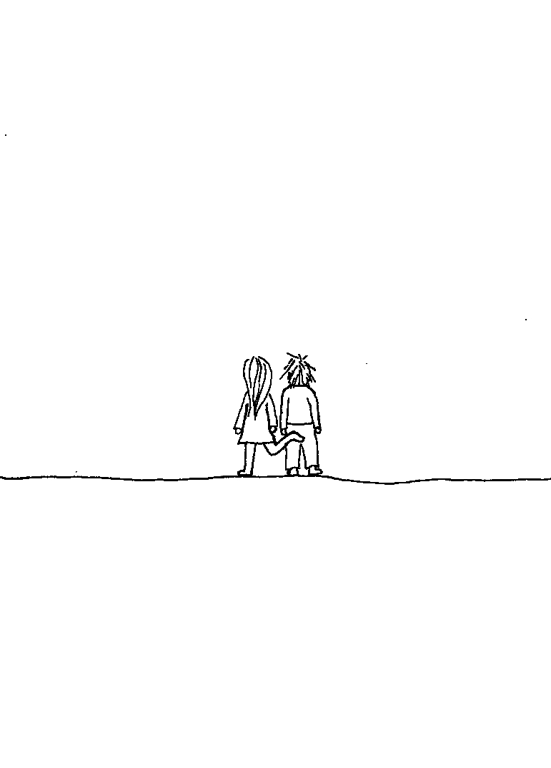

In [56]:
#init_image.thumbnail((500,500))
init_image

### *Prompt*

In [42]:
prompt = "a black and white cartoon of girl diving off a cliff in the style of shell silverstein"

### *Image Generation from both Text and Image*

  0%|          | 0/45 [00:00<?, ?it/s]

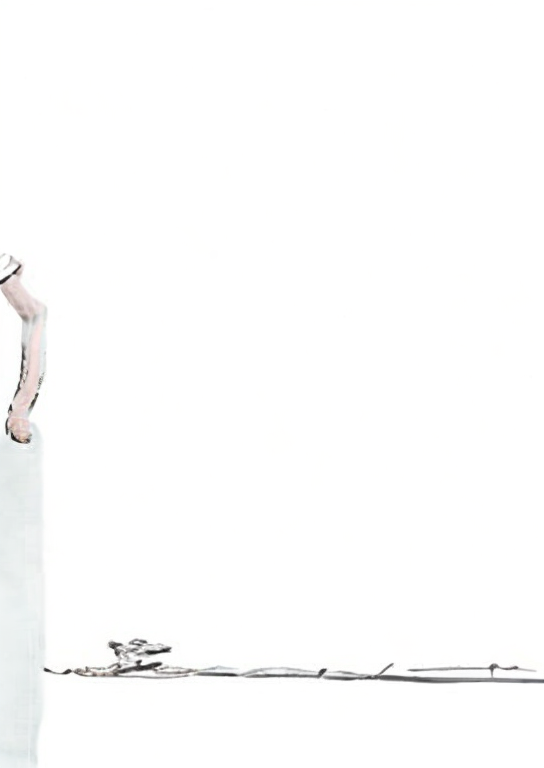

In [46]:
images = pipe(prompt=prompt, image=init_image, strength=.9, guidance_scale=1).images
#images[0].save("fantasy_landscape.png")

images[0]

Parameters to tweak are: 

1. the text prompt 

2. the strength of the noise we introduce (0 reproduces the original image and 1 allows most freedom) 

3. guidance (how important the text prompt is)